# IMDB Project

### Import modules

In [14]:
from keras.datasets import imdb
from keras import models, layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

### Import the data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Check the resulting data

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])
decoded_review
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

### Data Wrangling

In [37]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


### Prepare the model

In [53]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [56]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Fit the Model

In [20]:
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 5s 134ms/step - loss: 0.5176 - accuracy: 0.7859 - val_loss: 0.3889 - val_accuracy: 0.8688
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3164 - accuracy: 0.8953 - val_loss: 0.3135 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2407 - accuracy: 0.9189 - val_loss: 0.2906 - val_accuracy: 0.8831
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1910 - accuracy: 0.9344 - val_loss: 0.2956 - val_accuracy: 0.8800
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1600 - accuracy: 0.9468 - val_loss: 0.3297 - val_accuracy: 0.8722
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1376 - accuracy: 0.9561 - val_loss: 0.3028 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1167 - accuracy: 0.9636 - val_loss: 0.2995 - val_accuracy: 0.8855
Epoch 8/20
3

<module 'matplotlib.pyplot' from 'C:\\Users\\jerre\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

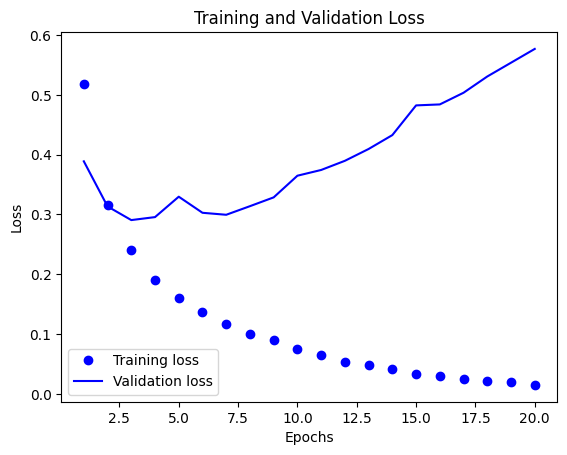

In [27]:
hist = history.history
loss_val = hist['loss']
val_loss = hist['val_loss']

epochs = range(1,len(loss_val)+1)
plt.plot(epochs,loss_val,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\jerre\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

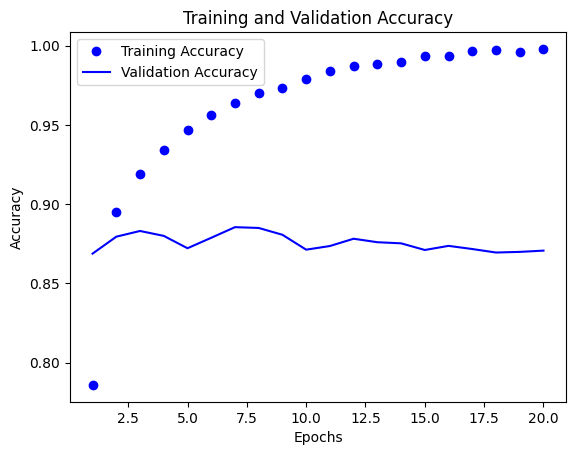

In [29]:
acc = hist['accuracy']
val_acc = hist['val_accuracy']

epochs = range(1,len(loss_val)+1)
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt

In [55]:
history = model.fit(x_train, y_train, batch_size=512, epochs=4)
results = model.evaluate(x_test,y_test)
print("Results:", results)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1542 - accuracy: 0.8053
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0859 - accuracy: 0.8982
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0682 - accuracy: 0.9172
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0920 - accuracy: 0.8752
Results: [0.09201329946517944, 0.8751599788665771]


### Using the model to predict

In [41]:
model.predict(x_test)

782/782 [==============================] - 3s 2ms/step


array([[0.19628897],
       [0.9996962 ],
       [0.8268135 ],
       ...,
       [0.07733882],
       [0.07133469],
       [0.55021435]], dtype=float32)